# Exploring results (MD maps)

In [4]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

In [8]:
paramtype = 'MD'
analysis_name='%s_wo_ventvol'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20161219', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmatrix3.xls'
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/SPM.mat']


In [9]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.original_version(paramtype, excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmatrix3.xls looking up column MD ...
Analysis name: MD_wo_ventvol
Columns used in the model: ['Apoe2-3', 'Apoe2-4', 'Apoe3-3', 'Apoe3-4', 'Apoe4-4', 'age23', 'age24', 'age33', 'age34', 'age44', 'agesq23', 'agesq24', 'agesq33', 'agesq34', 'agesq44', 'Gender(0=female)', 'Years of Education']
Analysis name: MD_wo_ventvol
Scans (513): [u'/home/grg/spm/MD/10070_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10102_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10108_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10235_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10365_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10419_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10463_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10530_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10551_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10563_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10576_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10630_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10668_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10692_MD_MNIspace_s.nii', u'/home/

NameError: name 'pd' is not defined

/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0006.nii
/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0007.nii
/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0008.nii
/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0009.nii
/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0010.nii
/home/grg/spm/analysis_20161219/MD_wo_ventvol/estimatecontrasts/spmT_0011.nii


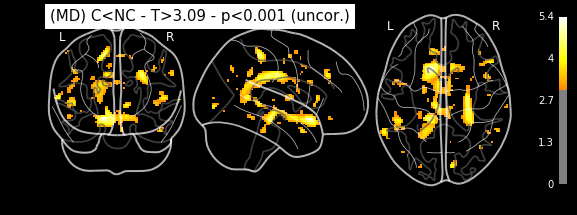

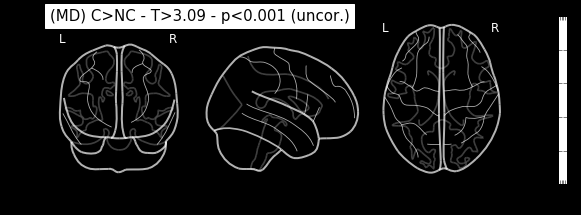

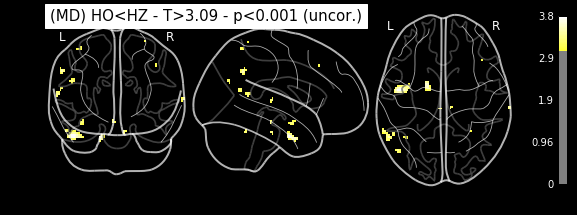

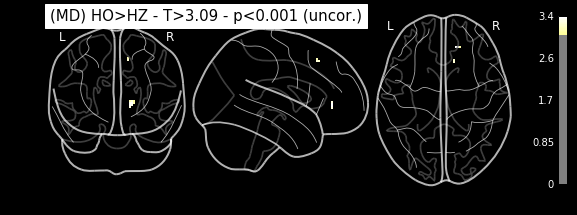

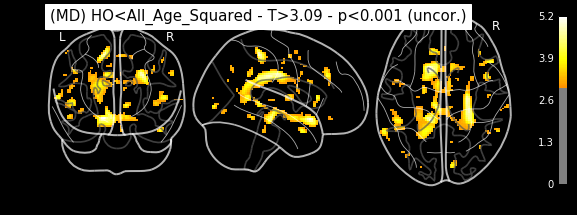

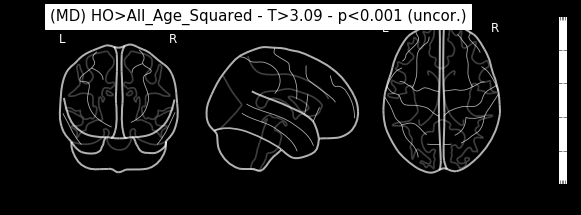

In [10]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0006.nii
Saving to... /tmp/tmpnOWEvh.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0007.nii
Saving to... /tmp/tmp25wuMM.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0008.nii
Saving to... /tmp/tmpgeRcY2.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0009.nii
Saving to... /tmp/tmpUegLTt.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0010.nii
Saving to... /tmp/tmpbIngVU.png
/home/grg/spm/analysis/MD_wo_ventvol/estimatecontrasts/spmT_0011.nii
Saving to... /tmp/tmpa4eIbN.png


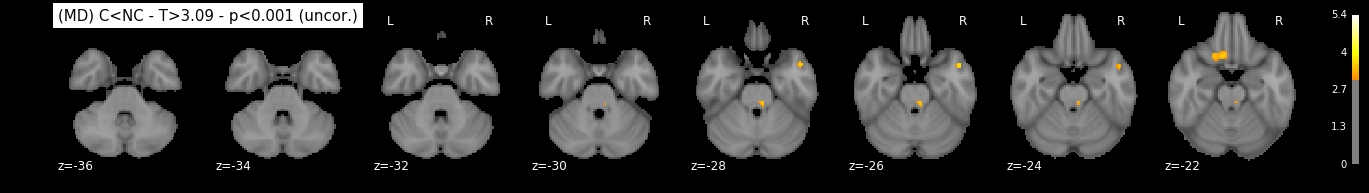

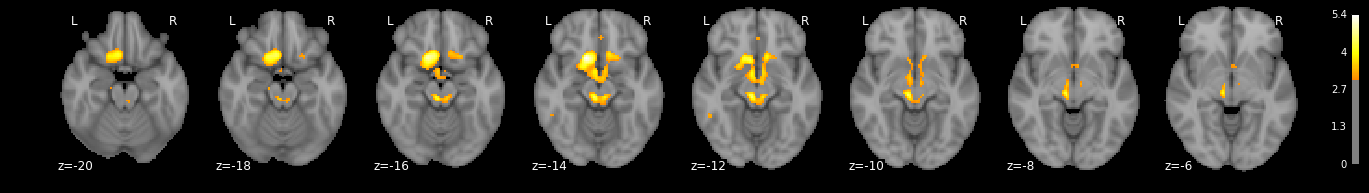

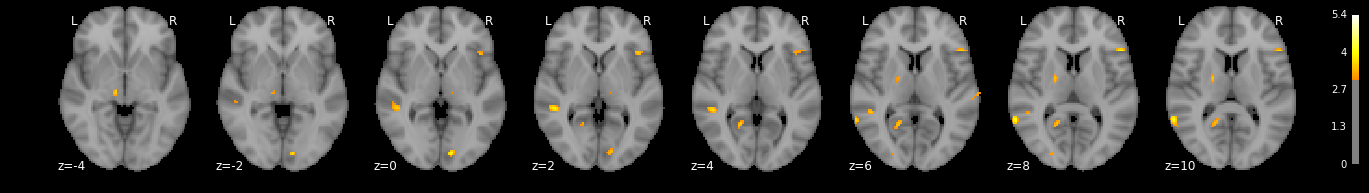

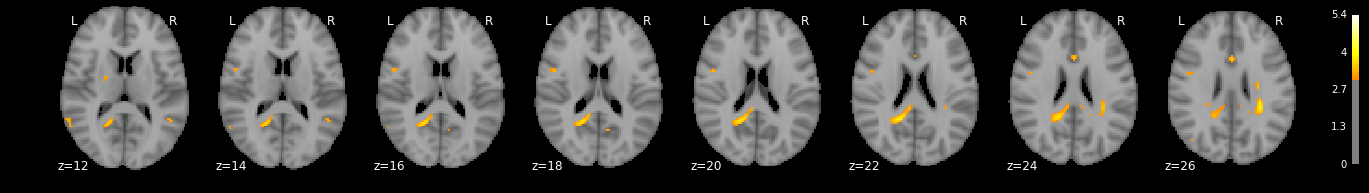

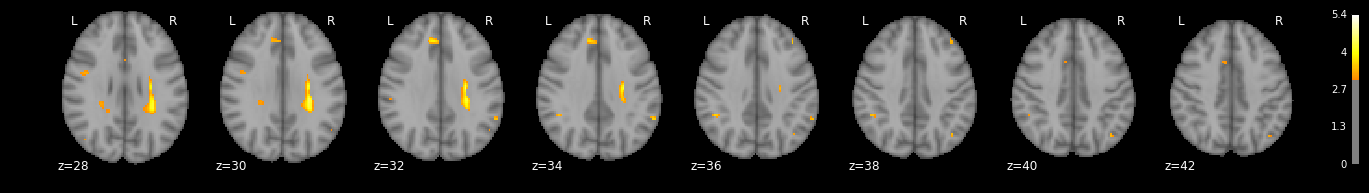

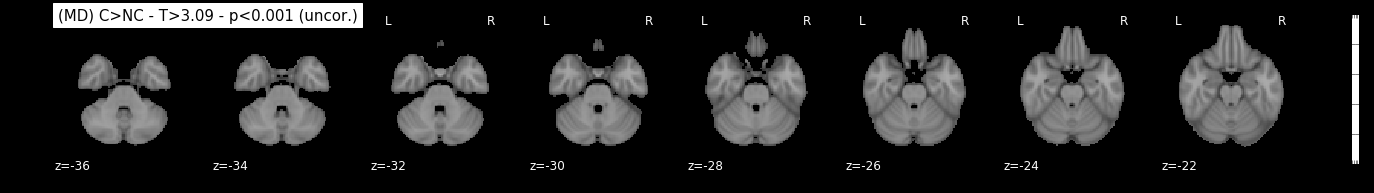

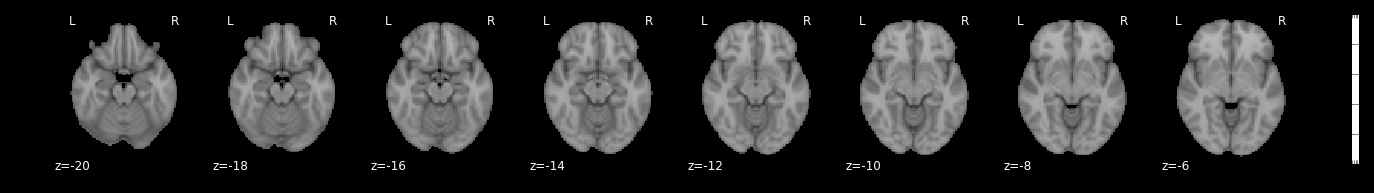

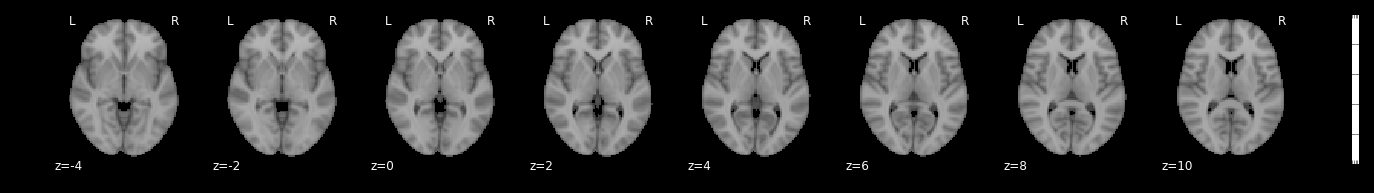

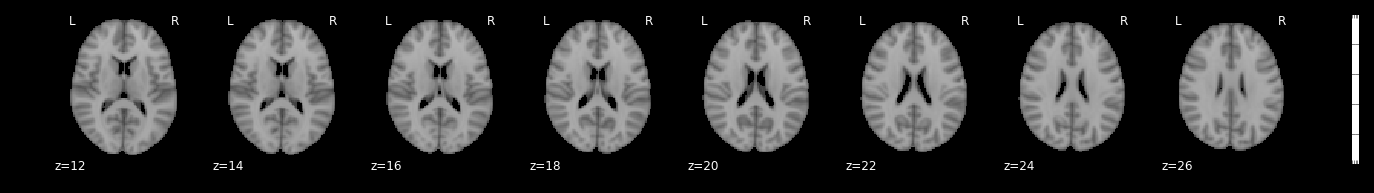

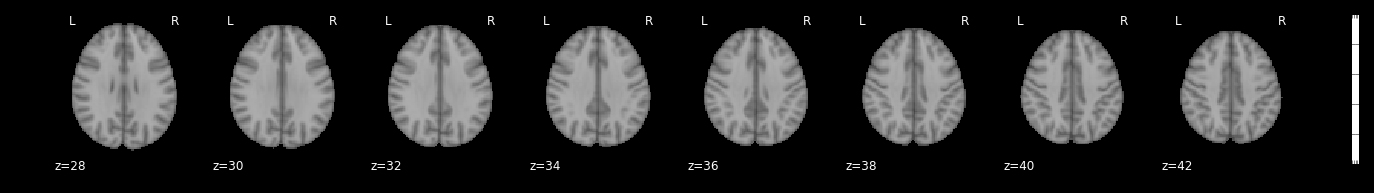

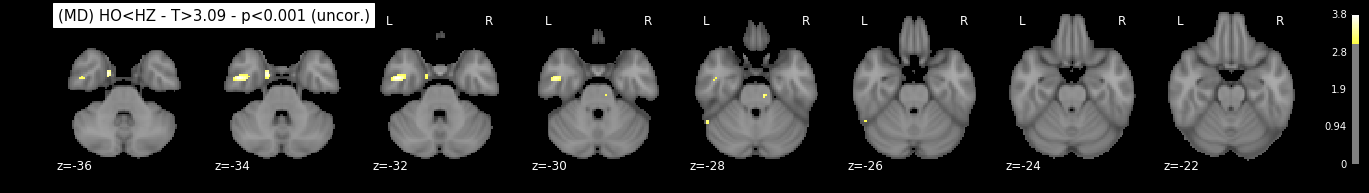

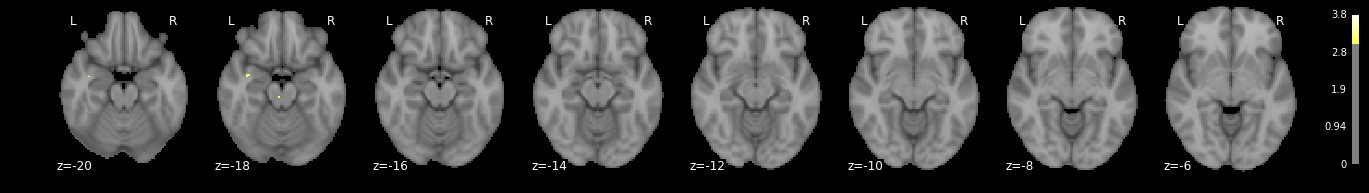

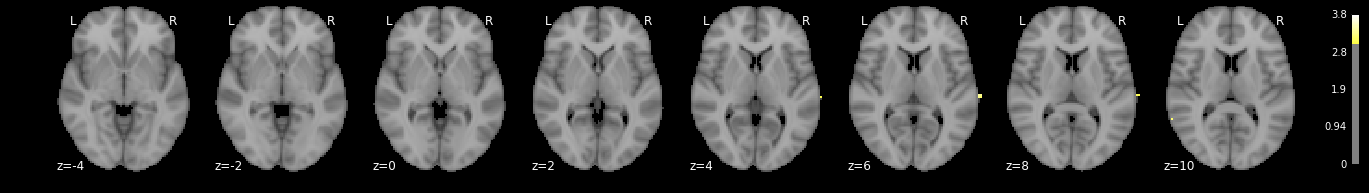

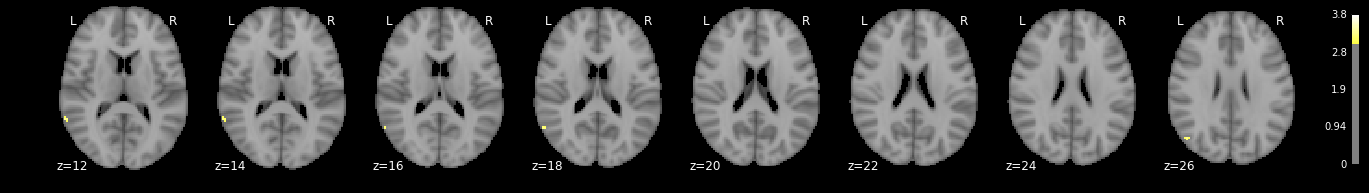

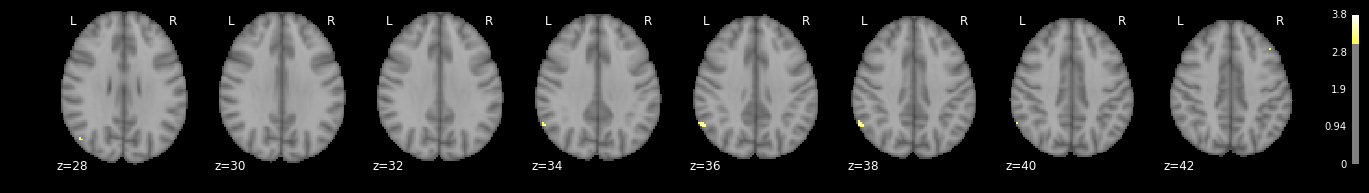

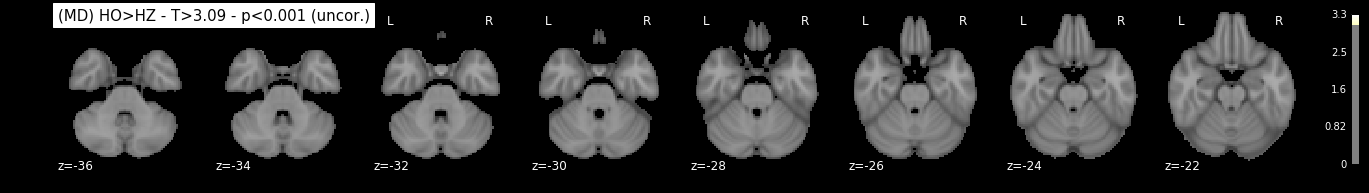

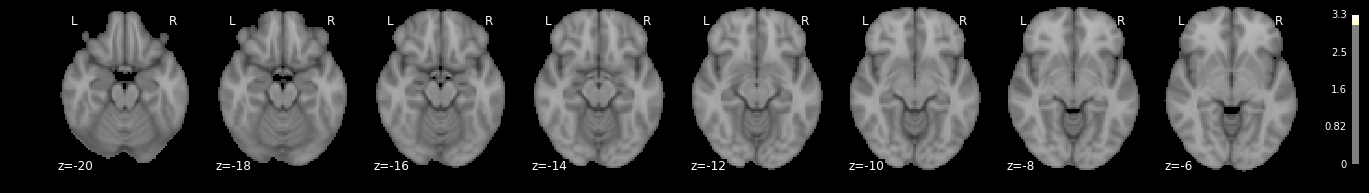

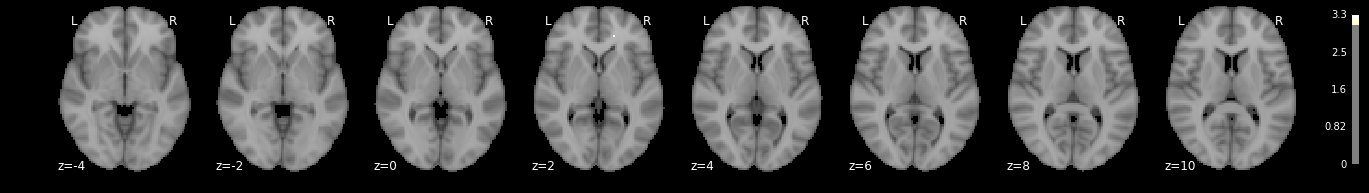

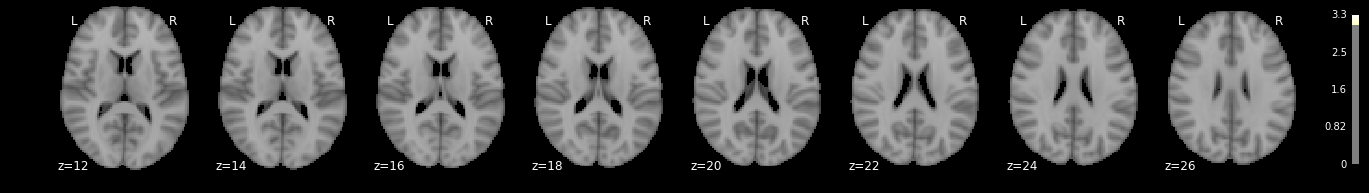

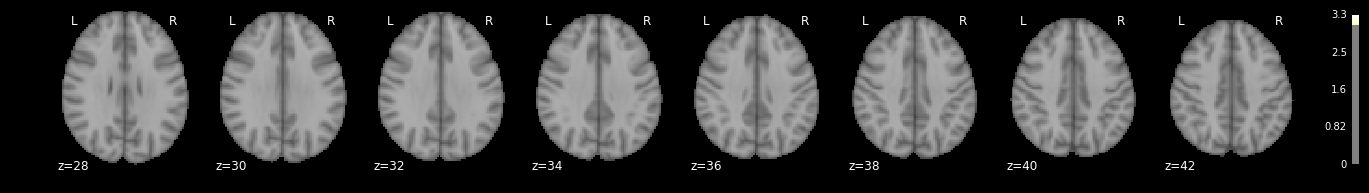

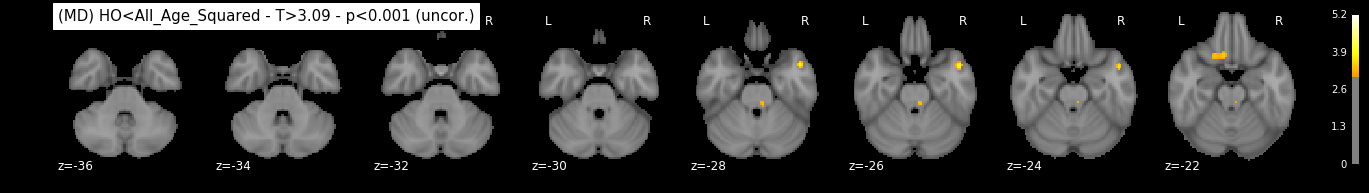

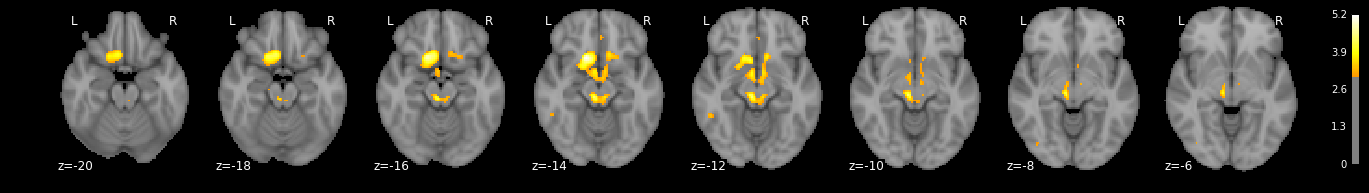

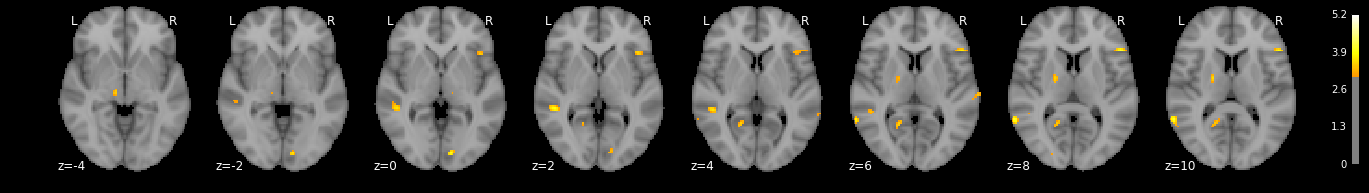

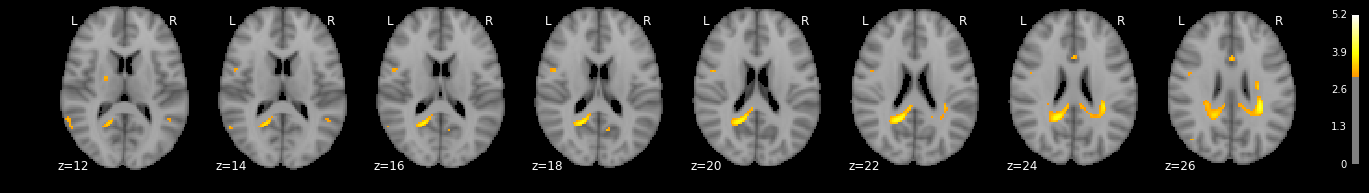

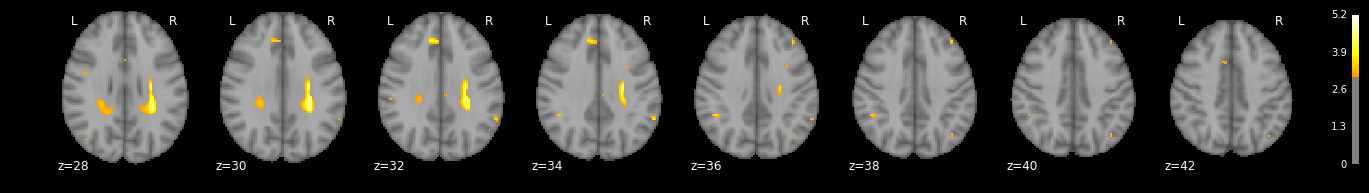

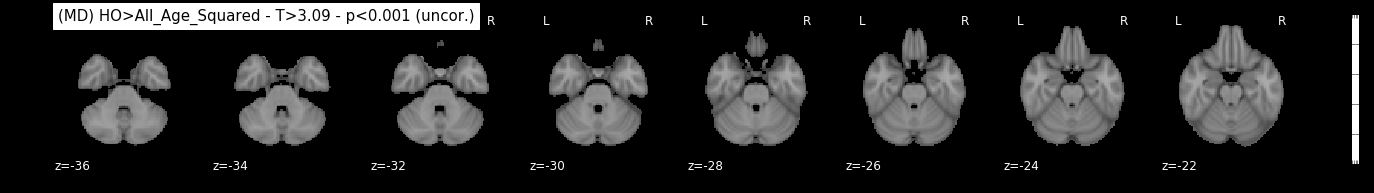

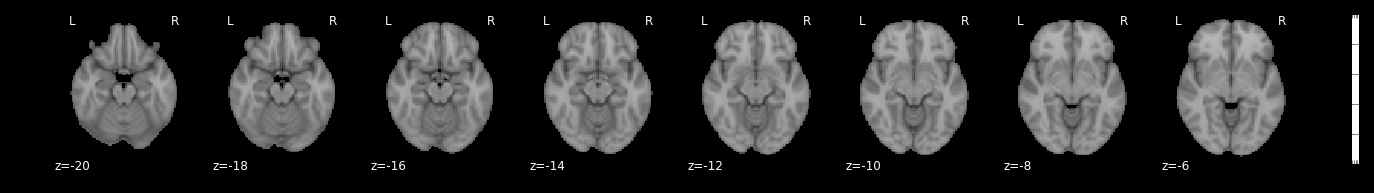

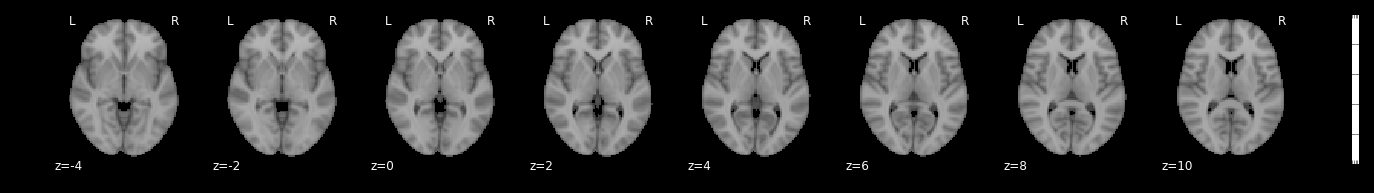

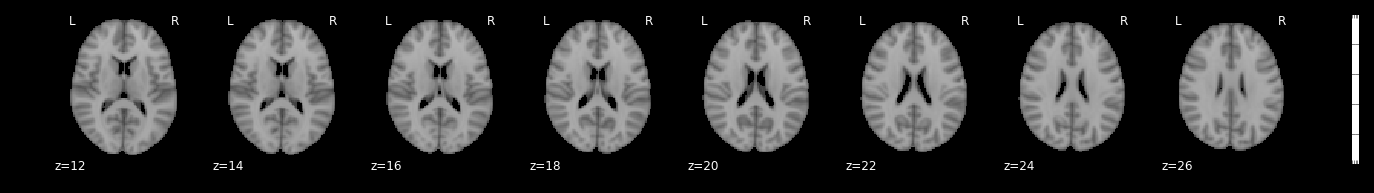

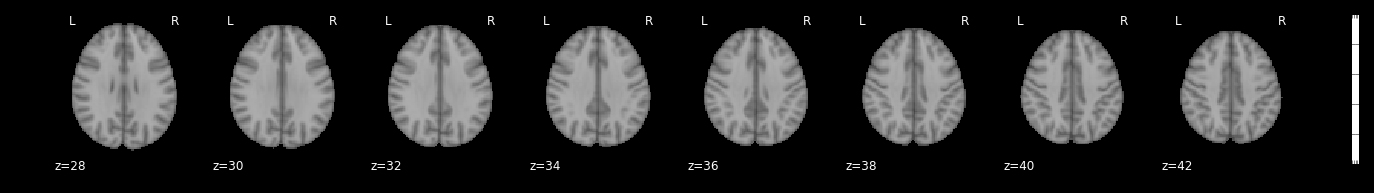

In [15]:
for i in range(6, 12):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-36, end=36, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()